# **Download the UCI REPO**

In [ ]:
!pip install ucimlrepo

# **Importing the dataset**

In [69]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets



In [70]:
import pandas as pd


y_df = y.reset_index(drop=True)

# Concatenate the features and target labels along the columns
merged_df = pd.concat([X.reset_index(drop=True), y_df], axis=1)

# merge the label (target) colom with feature Data Frame
merged_df.columns = list(X.columns) + ['target']




In [71]:
# Display the new DataFrame
merged_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,target
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [73]:

merged_df['target'] = merged_df['target'].replace('ckd\t', 'ckd')

In [74]:
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

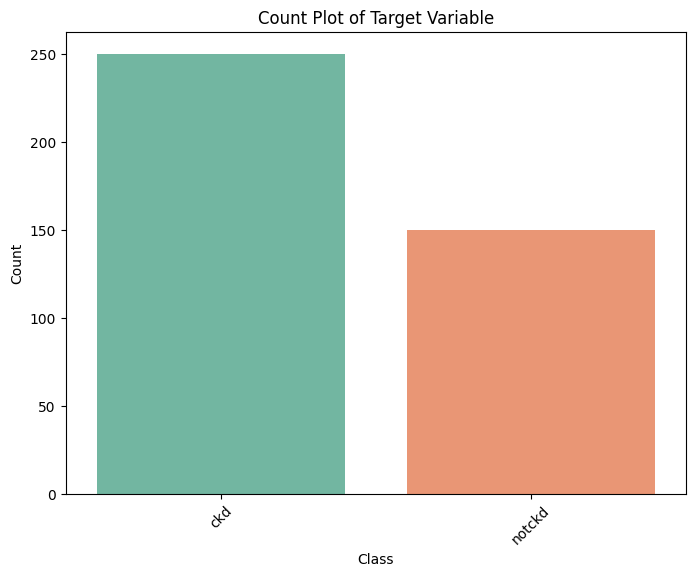

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_df['target'], palette='Set2')  # Use 'Set2' for color palette
plt.title('Count Plot of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

# **Preprocessing**

In [76]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values for numerical columns with the mean
for col in X.select_dtypes(include=['float64']).columns:
    X[col].fillna(X[col].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in X.select_dtypes(include=['object']).columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Create a LabelEncoder instance
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Display the first few rows to confirm encoding and missing values handling
X.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.200000,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,4.707435,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,4.707435,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.900000,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.600000,0,1,0,0,0,0


In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [78]:
X.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.882500,0.810000,0.105000,0.055000,148.036517,...,12.526437,38.884498,8406.122449,4.707435,0.367500,1.340000,0.085000,0.205000,0.190000,0.150000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,74.782634,...,2.716171,8.151081,2523.219976,0.840314,0.482728,0.479557,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,10.875000,34.000000,6975.000000,4.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,12.526437,38.884498,8406.122449,4.707435,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,150.000000,...,14.625000,44.000000,9400.000000,5.100000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
merged_df['target'].value_counts()

,count
target,
ckd,250
notckd,150


# **Correlation Matrix**

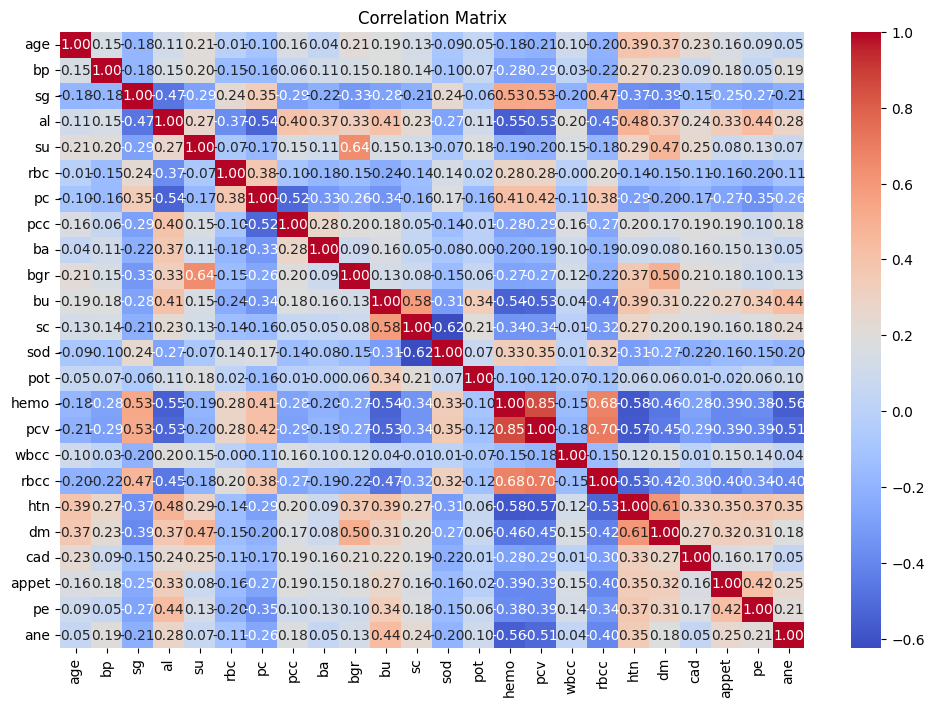

In [80]:


# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [81]:
merged_df['target']=le.fit_transform(merged_df['target'])

In [82]:
merged_df['target'].value_counts()

,count
target,
0,250
1,150


In [83]:

# Step 2: Apply Machine Learning Models

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, merged_df['target'], test_size=0.2, random_state=42)


# **Model implementation**

--- Logistic Regression ---
Confusion Matrix:
[[51  1]
 [28  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78        52
           1       0.00      0.00      0.00        28

    accuracy                           0.64        80
   macro avg       0.32      0.49      0.39        80
weighted avg       0.42      0.64      0.51        80

Accuracy: 0.64
Training Time: 0.0133 seconds
Prediction Time: 0.0026 seconds



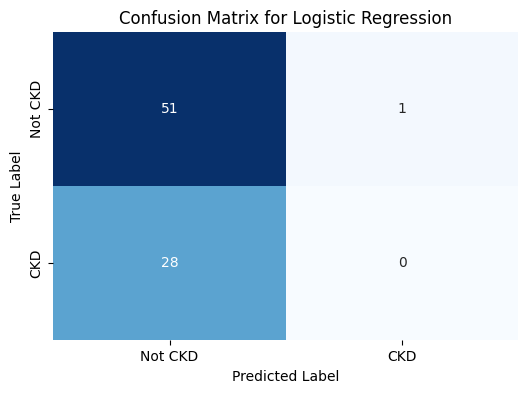

In [84]:

import time


def evaluate_model(model, model_name):
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Measure prediction time
    start_predict = time.time()
    y_pred = model.predict(X_test)
    end_predict = time.time()
    prediction_time = end_predict - start_predict

    # Print evaluation metrics
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()



# 1. Logistic Regression
evaluate_model(LogisticRegression(max_iter=10), "Logistic Regression")


--- Decision Tree ---
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.99
Training Time: 0.0079 seconds
Prediction Time: 0.0029 seconds



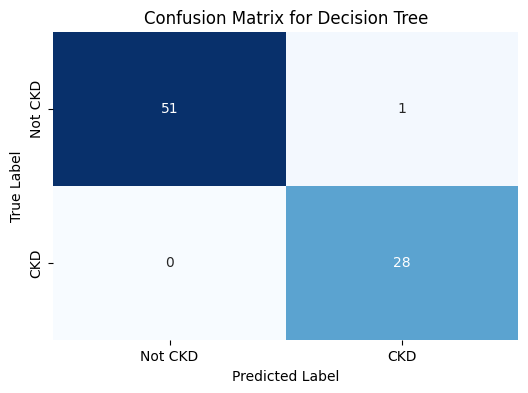

In [85]:

# 2. Decision Tree
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")


--- Random Forest ---
Confusion Matrix:
[[52  0]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.00
Training Time: 0.1719 seconds
Prediction Time: 0.0067 seconds



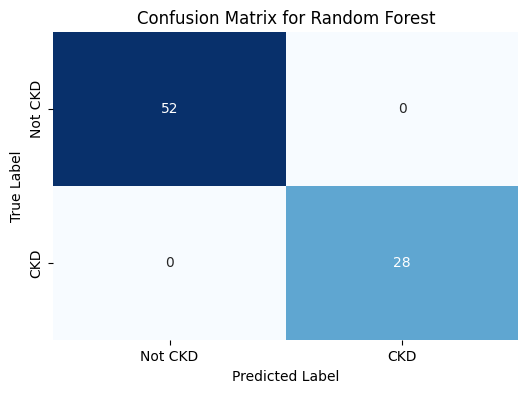

In [86]:
# 3. Random Forest
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")

--- K-Nearest Neighbors ---
Confusion Matrix:
[[33 19]
 [ 3 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        52
           1       0.57      0.89      0.69        28

    accuracy                           0.72        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80

Accuracy: 0.72
Training Time: 0.0041 seconds
Prediction Time: 0.0085 seconds



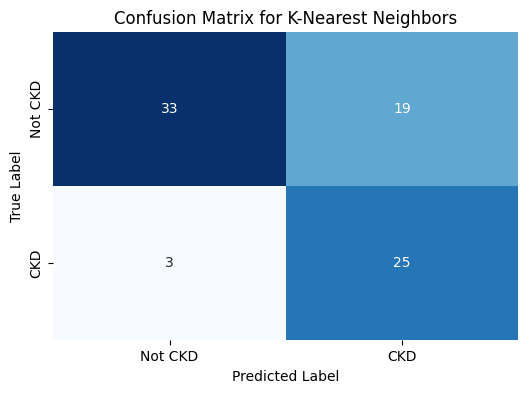

In [87]:


# 4. K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")

--- Support Vector Machine ---
Confusion Matrix:
[[52  0]
 [28  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Accuracy: 0.65
Training Time: 0.0168 seconds
Prediction Time: 0.0076 seconds



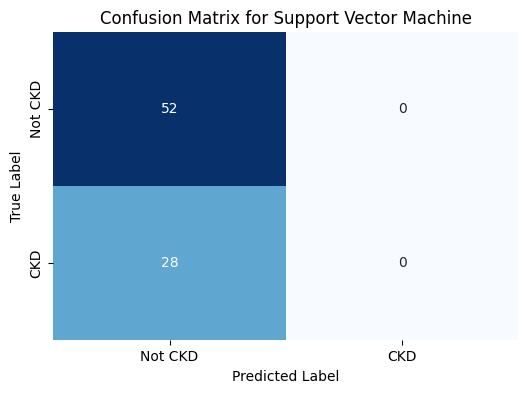

In [88]:

# 5. Support Vector Machine
evaluate_model(SVC(), "Support Vector Machine")


--- Gradient Boosting ---
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.99
Training Time: 0.2033 seconds
Prediction Time: 0.0022 seconds



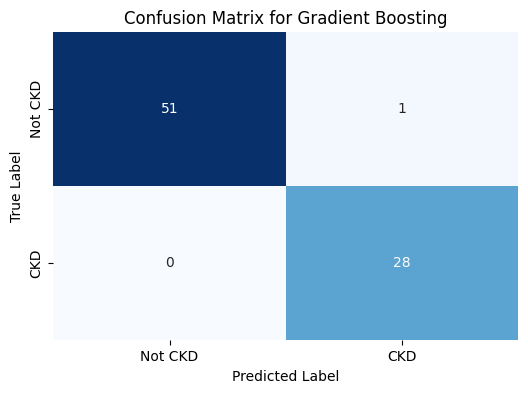

In [89]:



# 6. Gradient Boosting
evaluate_model(GradientBoostingClassifier(), "Gradient Boosting")


# **Model implementation with standardScaler**

In [90]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled=scaler.fit_transform(X)

In [91]:
y_train

,target
3,0
18,0
202,0
250,1
274,1
...,...
71,0
106,0
270,1
348,1


--- Logistic Regression ---
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.99

Training Time: 0.0162 seconds
Prediction Time: 0.0004 seconds



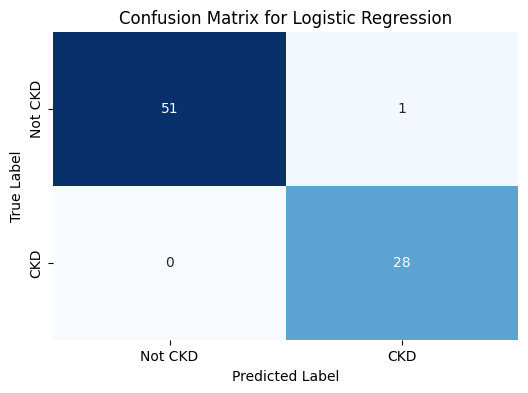

In [107]:


# Define a function to train, evaluate, and plot the confusion matrix for a given model
def evaluate_model(model, model_name):
    # Train the model
    start_train = time.time()
    model.fit(X_train_scaled, y_train)
    end_train = time.time()
    training_time = end_train - start_train


    # Make predictions
    start_predict = time.time()
    y_pred = model.predict(X_test_scaled)
    end_predict = time.time()
    prediction_time = end_predict - start_predict

    # Print evaluation metrics
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# 1. Logistic Regression
evaluate_model(LogisticRegression(max_iter=5), "Logistic Regression")


--- Decision Tree ---
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.99

Training Time: 0.0044 seconds
Prediction Time: 0.0005 seconds



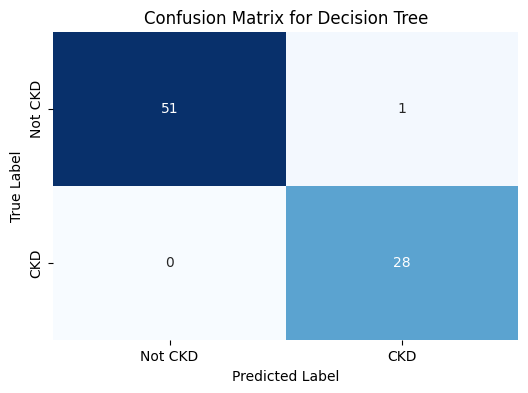

In [108]:

# 2. Decision Tree
evaluate_model(DecisionTreeClassifier(), "Decision Tree")


--- Random Forest ---
Confusion Matrix:
[[52  0]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.00

Training Time: 0.4245 seconds
Prediction Time: 0.0148 seconds



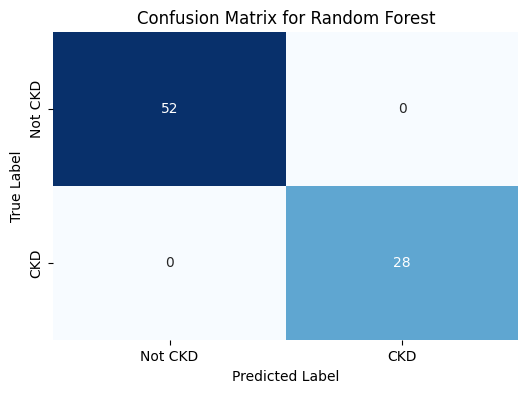

In [109]:
# 3. Random Forest
evaluate_model(RandomForestClassifier(), "Random Forest")

--- K-Nearest Neighbors ---
Confusion Matrix:
[[50  2]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Accuracy: 0.97

Training Time: 0.0024 seconds
Prediction Time: 0.0116 seconds



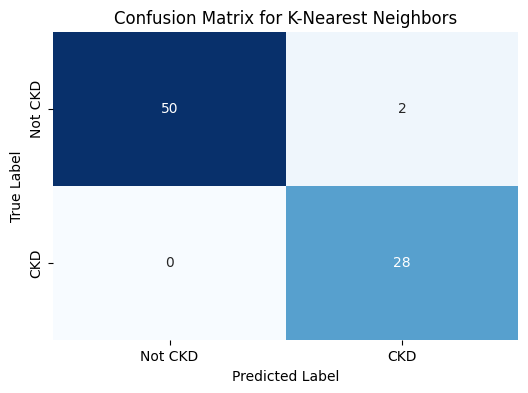

In [110]:


# 4. K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")

--- Support Vector Machine ---
Confusion Matrix:
[[52  0]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.00

Training Time: 0.0051 seconds
Prediction Time: 0.0011 seconds



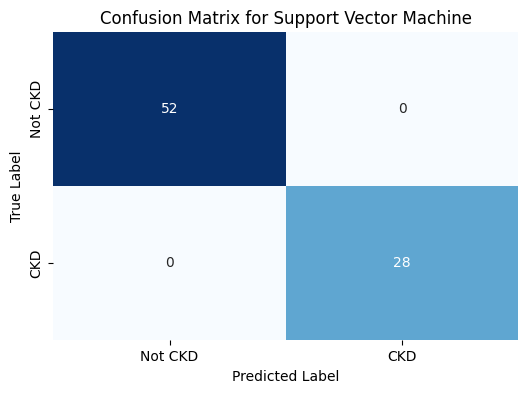

In [111]:

# 5. Support Vector Machine
evaluate_model(SVC(), "Support Vector Machine")


--- Gradient Boosting ---
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.99

Training Time: 0.2216 seconds
Prediction Time: 0.0008 seconds



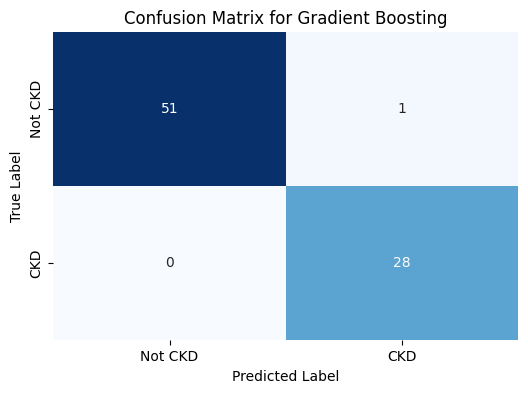

In [112]:



# 6. Gradient Boosting
evaluate_model(GradientBoostingClassifier(), "Gradient Boosting")


# **Kfold**

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:

model = LogisticRegression(max_iter=10)
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.98 model accuracy score and model standard deviation  0.01


In [100]:

model = SVC()
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.99 model accuracy score and model standard deviation  0.01


In [101]:

model = KNeighborsClassifier()
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.96 model accuracy score and model standard deviation  0.03


In [102]:

model = DecisionTreeClassifier()
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.96 model accuracy score and model standard deviation  0.01


In [103]:

model = RandomForestClassifier()
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.98 model accuracy score and model standard deviation  0.01


In [104]:

model = GradientBoostingClassifier()
accuracy = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f model accuracy score and model standard deviation  %0.2f" % (accuracy.mean(), accuracy.std()))

0.97 model accuracy score and model standard deviation  0.02
